<a href="https://colab.research.google.com/github/pol-alones/bioinformatic/blob/main/K_means_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering with K-means: Introduction with Iris 

## In class:

- Understand the usage of K-means
- Understand the Elbow method


## Preparting the dataset

In [11]:
# iris data
from sklearn.datasets import load_iris 

# Load iris data into samples
samples = load_iris()
# print(samples)

X = samples.data
print('X shape:', X.shape)
y = samples.target
print('y shape:', y.shape)


"""
X:
1) SepalLength (Cm)
2) SepalWidth (Cm)
3) PetalLength (Cm)
4) PetalWidth (Cm)
y: Species
"""

X shape: (150, 4)
y shape: (150,)


'\nX:\n1) SepalLength (Cm)\n2) SepalWidth (Cm)\n3) PetalLength (Cm)\n4) PetalWidth (Cm)\ny: Species\n'

## sample data points

In [ ]:
print('x:', X[:3])
print('y:', y[:3])

x: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
y: [0 0 0]


## Clustering with K-means 

We need to know the "number of clusters". Iris dataset has 3 classes, we assume it to have 3 clusters as well. This is just to introduce you to how to use K-means.

In reality, you will not know the number of clusters beforehand!

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
# we only put X (not y)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# try predict the cluster of X
y_pred = model.predict(X)
print('predict:', y_pred.shape)
print(y_pred)

predict: (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## Visualize the clusters (Qualitatively)

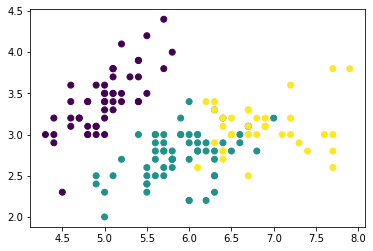

In [ ]:
import matplotlib.pyplot as plt
# we use scatter plot
# c=y; we color the dots by clusters
# however, we can only plot 2 dimensions (out of 4)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

In [ ]:
# Try using plotly.express instead of matplotlib.pyplot 
import plotly.express as px
X = px.data.iris()
fig = px.scatter(X, x="sepal_length", y="sepal_width", color="species")
fig.show()


### Comparing to the ground truth labels

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[1].scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Set1)
ax[0].set_title('Actual', fontsize=18)
ax[1].set_title('K-Means', fontsize=18)

## Measuring the "fitness" quantitatively with "inertia"


In [ ]:
# this is the "sum of squared" distance for all points to their centers
# better fitted model should have a lower inertia
print('inertia:', model.inertia_)

## Finding the right "K" using Elbow method


In [ ]:
# Run K-means for a set of k
from tqdm import tqdm
distortions = []
models = []
K = list(range(1, 10+1))
for k in tqdm(K):
    model = KMeans(n_clusters=k)
    model.fit(X)
    models.append(model)
    distortions.append(model.inertia_)

In [ ]:
# Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Clustering with different K

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = [*ax[0], *ax[1]]
for k, model, ax in zip(K, models, ax):
  y_pred = model.predict(X)
  ax.set_title(f'K={k}')
  ax.scatter(X[:,0], X[:,1], c=y_pred, s=16)

NameError: ignored

# Clustering with K-means of Yeast

## Preparing the dataset

In [33]:
import pandas as pd

# Load iris data into samples
samples = pd.read_csv('/content/196genes_635021f405530.csv')

df = samples.set_index('gene')
X = samples.iloc[:,:-1].values
Y = samples.iloc[:,-1].values
print(X)
print(Y)


[['SEC8' 0.19 0.186 ... 0.266 0.306 0.162]
 ['YPR147C' 0.149 0.152 ... 0.324 0.311 0.236]
 ['ITC1' 0.117 0.282 ... 0.284 0.196 0.154]
 ...
 ['RPS14A' 0.259 0.197 ... -0.04 0.197 -0.854]
 ['RPL34B' 0.491 0.076 ... 0.106 -0.077 -1.569]
 ['EFT2' 0.187 0.387 ... 0.285 -0.074 -0.824]]
[ 0.454  0.373  0.444  0.459  0.334  0.424  0.371  0.64   0.307  0.499
  0.422  0.226  0.287  0.426  0.452  3.696  3.768  4.354  4.239  4.28
  4.24   4.283  3.498  3.019  3.834  3.563  3.635  3.186  3.24   3.277
  3.045  3.389  3.677  3.313  3.849  3.191  3.122  3.115  3.244  3.
  3.261  3.642  3.832  3.032  3.824  3.065  2.256  2.991  3.116  2.5
  2.88   2.171  3.319  2.846  2.686  2.934  2.781  2.753  2.996  2.907
  2.725  2.538  2.813  2.934  2.358  2.436  2.55   2.576  2.378  2.686
  2.758  2.422  2.907  2.258  2.753  2.839  3.028  2.095  2.339  2.728
  3.126  2.483  2.262  2.319  2.217  2.668  2.781  2.179  2.906  3.421
  2.249  2.575  2.406  3.24   2.869  2.256  2.509 -2.823 -2.682 -2.712
 -2.706 -2.573 

## Clustering with K-means

In [21]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

## Finding the right "K" using Elbow method

In [22]:
# Run K-means for a set of k
from tqdm import tqdm
distortions = []
models = []
K = list(range(1, 10+1))
for k in tqdm(K):
    model = KMeans(n_clusters=k)
    model.fit(df)
    models.append(model)
    distortions.append(model.inertia_)

100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


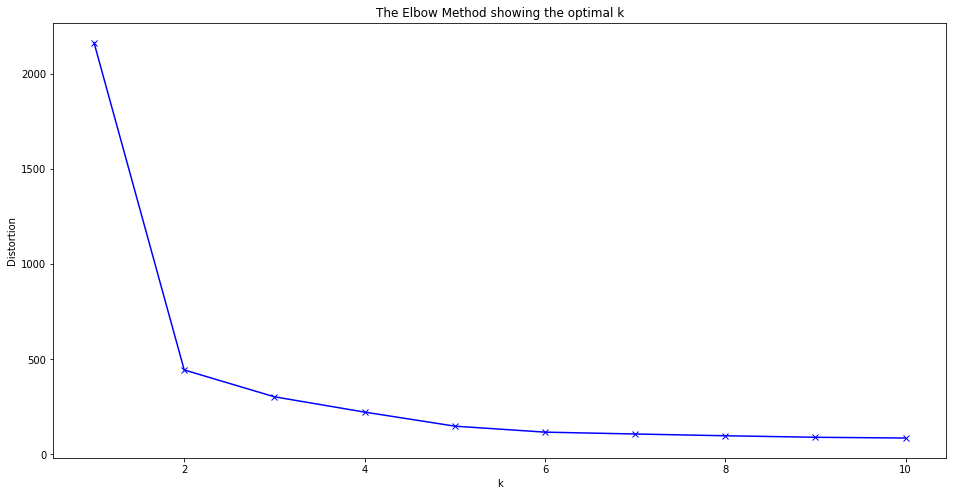

In [41]:
# Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Clustering with different K

(196, 7)


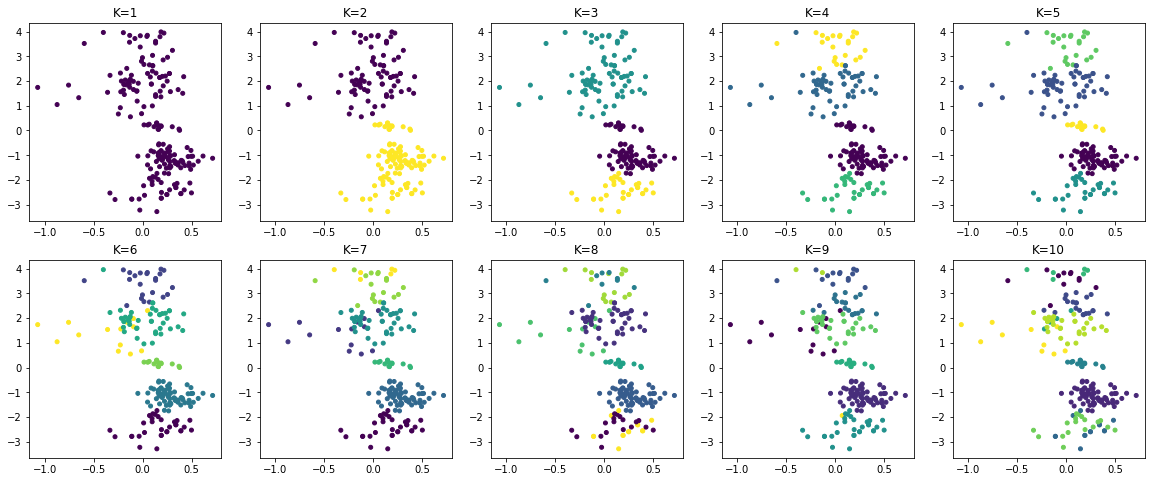

In [40]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = [*ax[0], *ax[1]]
print(X.shape)
for k, model, ax in zip(K, models, ax):
  y_pred = model.predict(df)
  ax.set_title(f'K={k}')
  ax.scatter(X[:,1], X[:,6], c=y_pred, s=16)

## Predict training data

In [60]:
k = 5;
model = KMeans(n_clusters=k)
model.fit(df)

KMeans(n_clusters=5)

In [63]:
y = model.predict(df)
print(y)
# for i in y:
#   print(i)
# group = {}
# for index, row in samples.iterrows():
#   if(y[index] not in group): group[y[index]] = []
#   group[y[index]].append(row[0])
# print(group)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


# Hierarchical Clustering

## Preparing the dataset

In [ ]:
import pandas as pd

# Load iris data into samples
samples = pd.read_csv('/content/196genes_635021f405530.csv')

df = samples.set_index('gene')
X = samples.iloc[:,:-1].values
print(X)
print(Y)


## Linkage using Euclidean

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df, method='ward', metric='euclidean')

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:2841: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



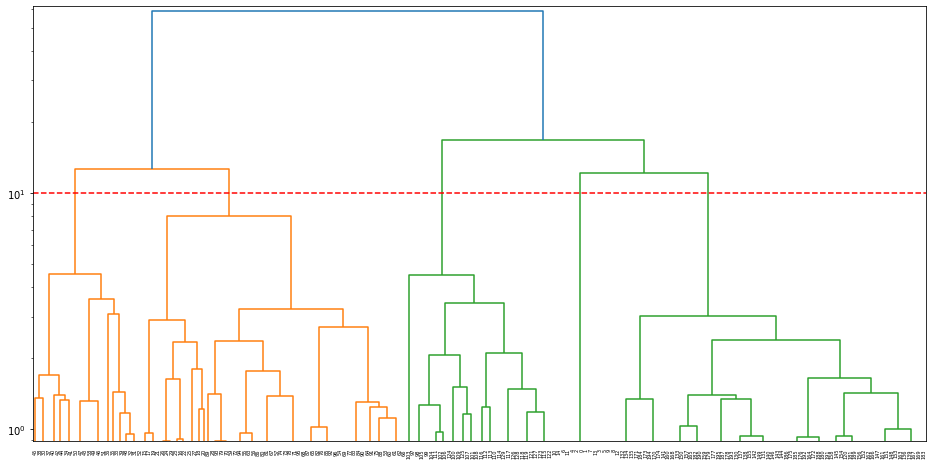

In [70]:
plt.figure(figsize=(16,8))
plt.yscale('log')
dendrogram(linkage_data)
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

## Clustering with K = 5

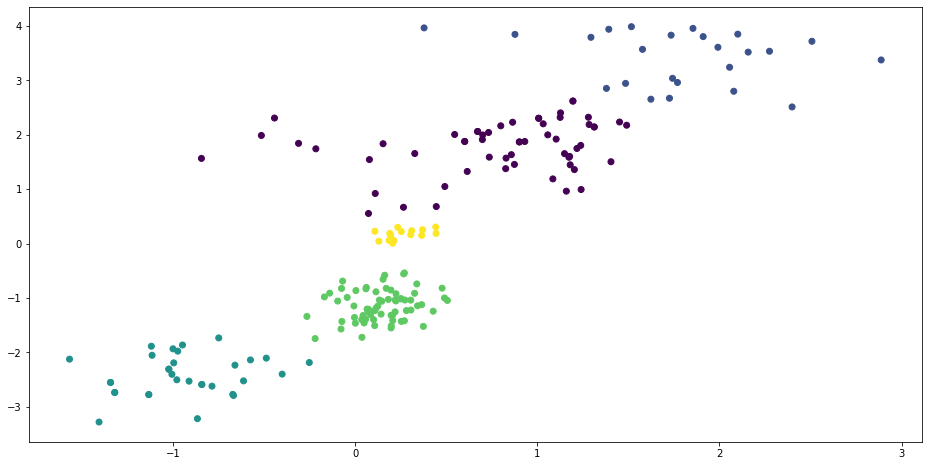

In [67]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df)

plt.figure(figsize=(16,8))
plt.scatter(X[:,5], X[:,6], c=labels)
plt.show()

## Finding the right "K" using Elbow methid

In [ ]:
# Run K-means for a set of k
from tqdm import tqdm
distortions = []
models = []
K = list(range(1, 10+1))
for k in tqdm(K):
    model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
    model.fit(X)
    models.append(model)
    distortions.append(model.inertia_)

In [ ]:
# Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Predict training data

In [72]:
y = hierarchical_cluster.fit_predict(df)
print(y)
# for i in y:
#   print(i)
# group = {}
# for index, row in samples.iterrows():
#   if(y[index] not in group): group[y[index]] = []
#   group[y[index]].append(row[0])
# print(group)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3]
